<h1>Preprocess data</h1>

In [1]:
import numpy as np
import gzip
import librosa
import torch
import matplotlib.pyplot as plt
import IPython.display as ipd
from scipy.io.wavfile import write

with gzip.open('audiobook_1_1.npz.gz', "rb") as f_in:
    data = dict(np.load(f_in))
    data =  {
        "data": data["audio"],
        "sr": data["fs"],
    }
    
data

{'data': array([ 0.00042725,  0.00012207, -0.00012207, ...,  0.00125122,
         0.00097656,  0.00106812], dtype=float32),
 'sr': array(48000)}

In [4]:
data['data'].shape

(21955710,)

In [5]:
rate = data['sr']
scaled = np.int16(data['data'] / np.max(np.abs(data['data'])) * 32767)
write('test.wav', rate, scaled)

In [ ]:
plt.figure(figsize=(14, 5))
librosa.display.waveshow(data['data'], sr=data['sr'])
ipd.Audio(data = data['data'], rate = np.array([data['sr']])[0])

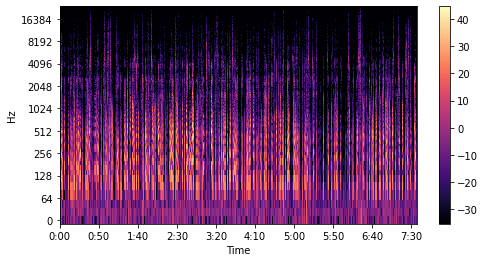

In [ ]:
X = librosa.stft(data['data'])
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(8, 4))
librosa.display.specshow(Xdb, sr=data['sr'], x_axis='time', y_axis='log')
plt.colorbar()

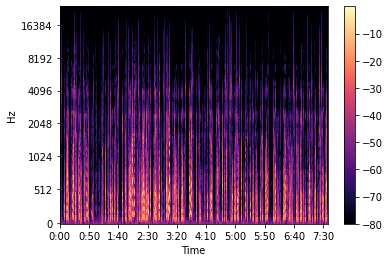

In [ ]:
S = librosa.feature.melspectrogram(y=data['data'], sr=data['sr'])
S_dB = librosa.power_to_db(S, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=data['sr'])
plt.colorbar(img)

<h1>Using model to get embedding</h1>

In [11]:
from transformers import Wav2Vec2FeatureExtractor, Wav2Vec2Model

input_audio, sample_rate = librosa.load('test.wav', sr=16000) #Downsample data from 48kHz to 16kHz

model_name = "Clementapa/wav2vec2-base-960h-phoneme-reco-dutch" #Get Model finetuned to Dutch language
feature_extractor = Wav2Vec2FeatureExtractor.from_pretrained(model_name)
model = Wav2Vec2Model.from_pretrained(model_name)

i= feature_extractor(input_audio, return_tensors="pt", sampling_rate=sample_rate)
with torch.no_grad():
     o = model(i.input_values)
     
print(o.last_hidden_state.shape)

torch.Size([1, 22870, 768])
